# Simple Neural Network Model with different inputs

Evaluating different inputs to select optimal features use AI models. Described in chapter 4.3.

Input: testing different inputs

Output: optimal max-shape portfolio with normal restrictions for the next period

## Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.regularizers import L2

import os
os.chdir(os.path.expanduser('../'))

from helper_functions import train_and_evaluate_model, calculate_returns_for_model, calculate_metrics

In [3]:
import os
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider
from PortfolioOptimizer import PortfolioOptimizer

In [4]:
data_provider = DataProvider()

df_countries, benchmark = data_provider.get_etf_data()
acwi_weights = data_provider.get_acwi_weights()
days_to_recalculate = data_provider.get_days_to_recalculate()

Preparing outputs common for all models

In [5]:
y = []
for i in range(0,len(days_to_recalculate)):
    if i == len(days_to_recalculate) - 1:
        data_period = df_countries.loc[
            days_to_recalculate[i]:]
    else:
        data_period = df_countries.loc[
            days_to_recalculate[i]:days_to_recalculate[i+1]]
    i += 1

    year_str = str(data_period.index[0].year)
    acwi_weights_year = acwi_weights.loc[year_str]

    optimizer = PortfolioOptimizer()
    w, constraints = optimizer.get_normal_constraints(acwi_weights_year)
    optimal_portfolio = optimizer.get_optimal_portfolio(
        data_period, w, constraints)
    y.append(optimal_portfolio.values)

y = np.array(y)
y.shape

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


(288, 27)

In [6]:
val_split = int(0.7 * y.shape[0])
test_split = int(0.8 * y.shape[0])

# Train
dates_for_training = days_to_recalculate[:val_split]
y_train = y[:val_split]

# Validation
dates_for_validation = days_to_recalculate[val_split:test_split]
y_val = y[val_split:test_split]

# Test
dates_for_test = days_to_recalculate[test_split:]
y_test = y[test_split:]

## Defining models for different inputs

### DNN Model with a single fixed weight composite indicators

In [45]:
x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_simple_composite_indicator(
        date, periods=6)
    x.append(indicators.values)

x_simple_composite_indicator = np.array(x)

x_train_simple_composite_indicator = x_simple_composite_indicator[:val_split]
x_val_simple_composite_indicator = x_simple_composite_indicator[val_split:test_split]
x_test_simple_composite_indicator = x_simple_composite_indicator[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.9005 - val_loss: 2.6578
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5820 - val_loss: 2.3605
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2913 - val_loss: 2.0904
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0277 - val_loss: 1.8467
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7904 - val_loss: 1.6281
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5777 - val_loss: 1.4327
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3871 - val_loss: 1.2587
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2179 - val_loss: 1.1041
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0679 - val_loss: 0.9670
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9345 - val_loss: 0.8456
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8169 - val_loss: 0.7382
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7122 - val_loss: 0.6434

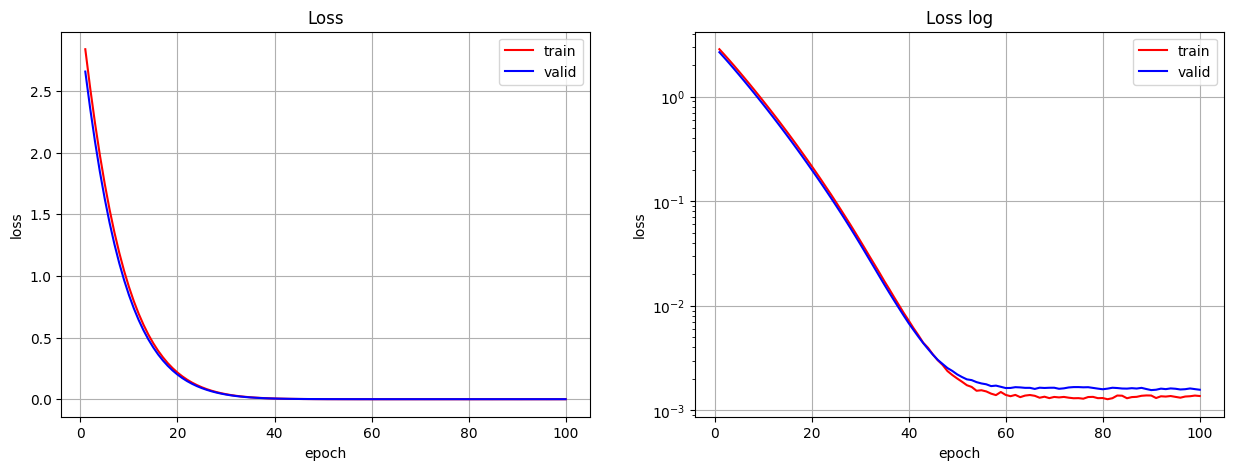

In [46]:
model_dnn_simple_composite_indicator = Sequential((
    Flatten(input_shape=x_train_simple_composite_indicator.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_simple_composite_indicator, 
                         x_train_simple_composite_indicator, y_train,
                         x_val_simple_composite_indicator, y_val, 
                         x_test_simple_composite_indicator, y_test)

### DNN Model with a single Manufacturing PMI indicator

In [9]:
indicator = 'Manufacturing PMI'
x = []
for date in days_to_recalculate:
    df = data_provider.get_key_indicator_values(indicator)
    df_normalized = data_provider.normilize_dataframe(df)
    df_last_values = data_provider.get_latest_data(
        indicator, df_normalized, date, periods=6)
    x.append(df_last_values.values)

x_manufacturing_pmi = np.array(x)

x_train_manufacturing_pmi = x_manufacturing_pmi[:val_split]
x_val_manufacturing_pmi = x_manufacturing_pmi[val_split:test_split]
x_test_manufacturing_pmi = x_manufacturing_pmi[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.8267 - val_loss: 2.5895
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5155 - val_loss: 2.2987
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2308 - val_loss: 2.0348
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9736 - val_loss: 1.7971
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7416 - val_loss: 1.5841
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5342 - val_loss: 1.3939
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3490 - val_loss: 1.2247
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1851 - val_loss: 1.0743
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0385 - val_loss: 0.9410
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9091 - val_loss: 0.8230
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7946 - val_loss: 0.7187
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6931 - val_loss: 0.6266

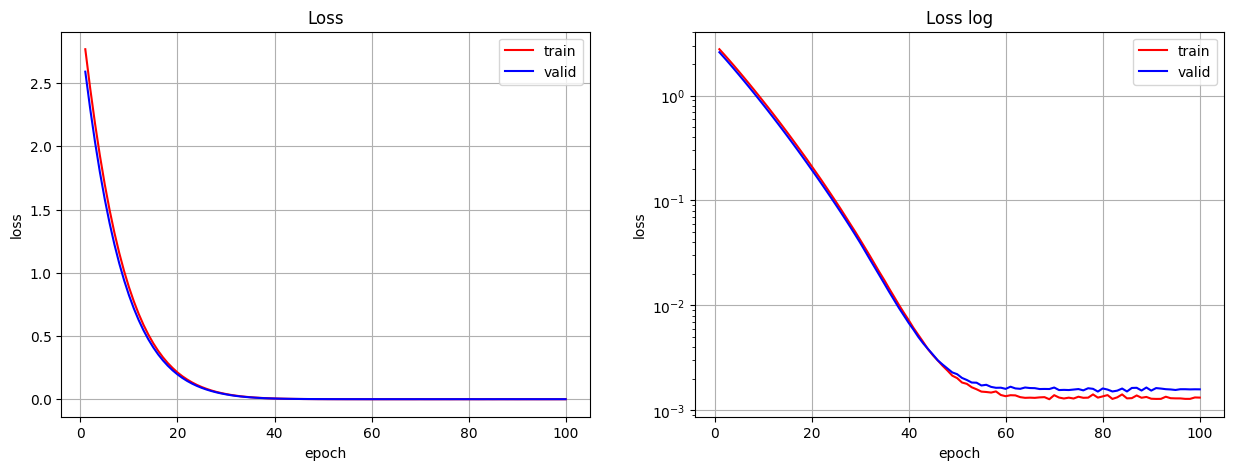

In [10]:
model_dnn_manufacturing_pmi = Sequential((
    Flatten(input_shape=x_train_manufacturing_pmi.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_manufacturing_pmi, 
                         x_train_manufacturing_pmi, y_train,
                         x_val_manufacturing_pmi, y_val, 
                         x_test_manufacturing_pmi, y_test)

### DNN Model with 6 separate indicators

In [11]:
x = []
for date in days_to_recalculate:
    indicators_arr = []
    for indicator in data_provider.key_indicators:
        df = data_provider.get_key_indicator_values(indicator)
        df_normalized = data_provider.normilize_dataframe(df)
        indicators_arr.append(data_provider.get_latest_data(
            indicator, df_normalized, date, periods=6).values)

    concat_indicators = np.concatenate(indicators_arr, axis=1)
    x.append(concat_indicators)

x_separate_indicators = np.array(x)

x_train_separate_indicators = x_separate_indicators[:val_split]
x_val_separate_indicators = x_separate_indicators[val_split:test_split]
x_test_separate_indicators = x_separate_indicators[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 972)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │        15,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,027 (62.61 KB)

 Trainable params: 16,027 (62.61 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9455 - val_loss: 2.3721
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2113 - val_loss: 1.7514
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6242 - val_loss: 1.2672
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1697 - val_loss: 0.8997
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8265 - val_loss: 0.6277
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5739 - val_loss: 0.4307
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3914 - val_loss: 0.2911
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2630 - val_loss: 0.1940
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1740 - val_loss: 0.1277
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1134 - val_loss: 0.0834
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0732 - val_loss: 0.0543
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0472 - val_loss: 0.0356

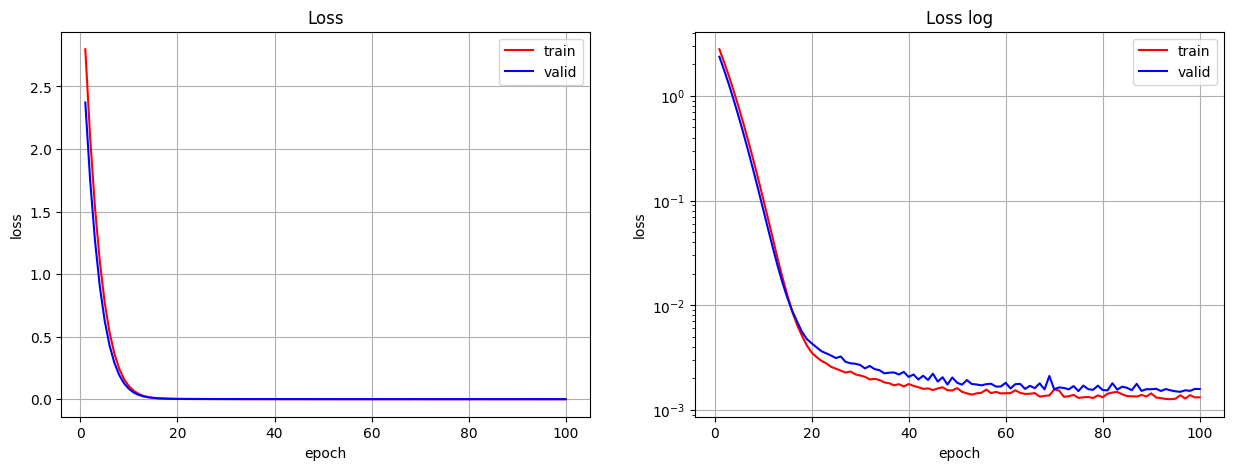

In [12]:
model_dnn_separate_indicators = Sequential((
    Flatten(input_shape=x_train_separate_indicators.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_separate_indicators, 
                         x_train_separate_indicators, y_train,
                         x_val_separate_indicators, y_val, 
                         x_test_separate_indicators, y_test)

### DNN Model with 15 separate indicators

In [13]:
all_indicators = data_provider.key_indicators + data_provider.additional_indicators

x = []
for date in days_to_recalculate:
    indicators_arr = []
    for indicator in all_indicators:
        df = data_provider.get_key_indicator_values(indicator)
        df_normalized = data_provider.normilize_dataframe(df)
        indicators_arr.append(data_provider.get_latest_data(
            indicator, df_normalized, date, periods=6).values)

    concat_indicators = np.concatenate(indicators_arr, axis=1)
    x.append(concat_indicators)

x_separate_all_indicators = np.array(x)

x_train_separate_all_indicators = x_separate_all_indicators[:val_split]
x_val_separate_all_indicators = x_separate_all_indicators[val_split:test_split]
x_test_separate_all_indicators = x_separate_all_indicators[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 2430)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │        38,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,355 (153.73 KB)

 Trainable params: 39,355 (153.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8736 - val_loss: 2.0214
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8051 - val_loss: 1.2132
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0688 - val_loss: 0.6849
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5945 - val_loss: 0.3628
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3099 - val_loss: 0.1802
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1507 - val_loss: 0.0846
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0689 - val_loss: 0.0385
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - val_loss: 0.0180
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - val_loss: 0.0095
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - val_loss: 0.0051
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0046

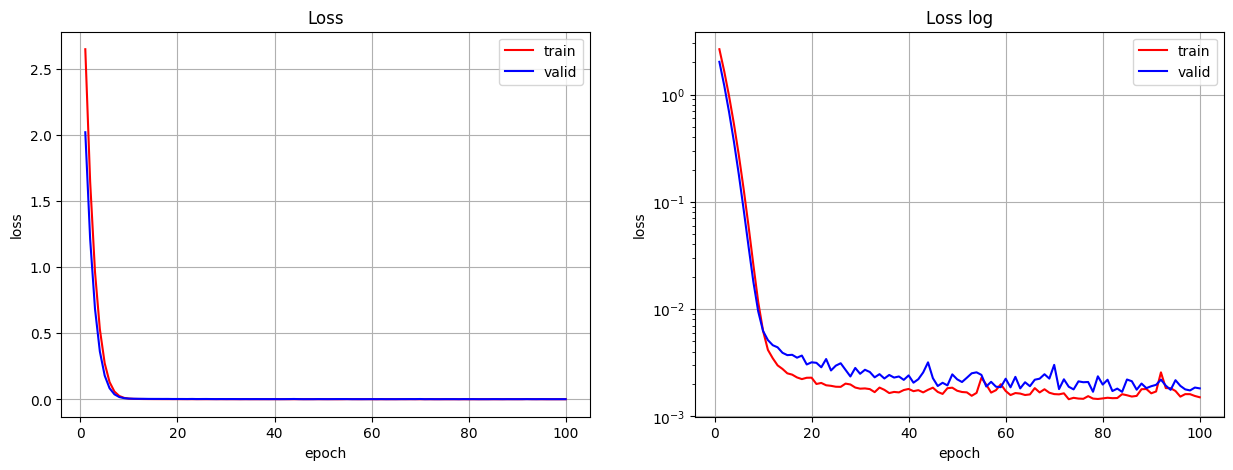

In [14]:
model_dnn_separate_all_indicators = Sequential((
    Flatten(input_shape=x_train_separate_all_indicators.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_separate_all_indicators, 
                         x_train_separate_all_indicators, y_train,
                         x_val_separate_all_indicators, y_val, 
                         x_test_separate_all_indicators, y_test)

### DNN Model with single principal component from PCA

In [15]:
x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_principal_component_from_indicators(
        date, periods=6, indicators=data_provider.key_indicators)
    x.append(indicators.values)

x_pca_component = np.array(x)

x_train_pca_component = x_pca_component[:val_split]
x_val_pca_component = x_pca_component[val_split:test_split]
x_test_pca_component = x_pca_component[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8886 - val_loss: 2.6458
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5700 - val_loss: 2.3480
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2795 - val_loss: 2.0778
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0152 - val_loss: 1.8343
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7775 - val_loss: 1.6162
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5656 - val_loss: 1.4216
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3760 - val_loss: 1.2484
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2075 - val_loss: 1.0947
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0582 - val_loss: 0.9584
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9255 - val_loss: 0.8379
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8089 - val_loss: 0.7313
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7052 - val_loss: 0.6373

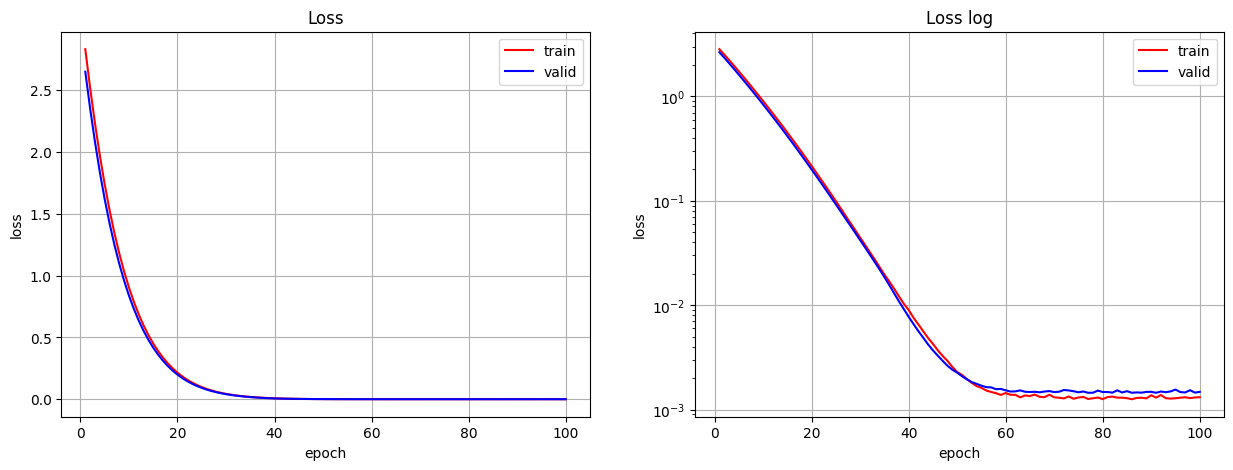

In [16]:
model_dnn_pca_component = Sequential((
    Flatten(input_shape=x_train_pca_component.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_pca_component, 
                         x_train_pca_component, y_train,
                         x_val_pca_component, y_val, 
                         x_test_pca_component, y_test)

### DNN Model with single principal component from PCA for all 15 indicators

In [17]:
all_indicators = data_provider.key_indicators + data_provider.additional_indicators

x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_principal_component_from_indicators(
        date, periods=6, indicators=all_indicators)
    x.append(indicators.values)

x_pca_component_all = np.array(x)

x_train_pca_component_all = x_pca_component_all[:val_split]
x_val_pca_component_all = x_pca_component_all[val_split:test_split]
x_test_pca_component_all = x_pca_component_all[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8559 - val_loss: 2.6139
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5407 - val_loss: 2.3192
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2525 - val_loss: 2.0518
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9914 - val_loss: 1.8110
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7568 - val_loss: 1.5953
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5470 - val_loss: 1.4030
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3598 - val_loss: 1.2319
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1929 - val_loss: 1.0801
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0460 - val_loss: 0.9456
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9150 - val_loss: 0.8266
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7993 - val_loss: 0.7214
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6970 - val_loss: 0.6287

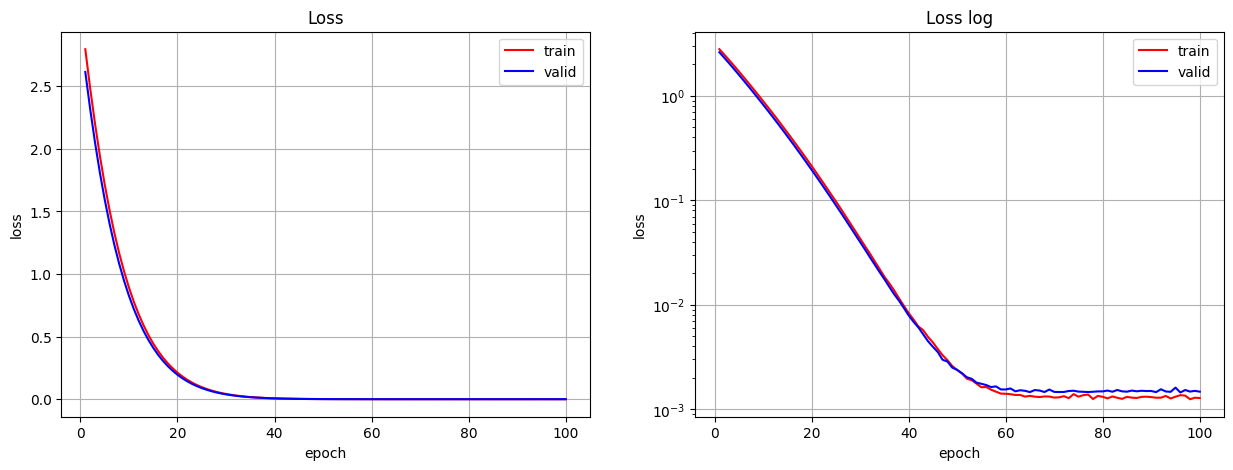

In [18]:
model_dnn_pca_component_all = Sequential((
    Flatten(input_shape=x_train_pca_component_all.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_pca_component_all, 
                         x_train_pca_component_all, y_train,
                         x_val_pca_component_all, y_val, 
                         x_test_pca_component_all, y_test)

### DNN Model with 2 principal components from PCA for all 15 indicators

In [19]:
all_indicators = data_provider.key_indicators + data_provider.additional_indicators
indicators = data_provider.calculate_principal_component_from_indicators(
        date, periods=6, indicators=all_indicators, n_components=2)
indicators

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Sweden,...,Norway,China,Taiwan,India,Korea,Brazil,Russia,South Africa,Mexico,Malaysia
0,0.505049,0.002480,-0.507787,-0.439170,0.281551,0.437360,0.370907,-0.067983,0.539203,0.743291,...,-0.071401,-0.823839,1.644053,-0.015760,-1.202930,0.241381,0.836672,0.371536,0.667002,-0.689984
1,-0.015579,-2.797163,-0.771594,-0.336770,0.758930,0.057919,-0.209749,-3.153330,0.958272,-0.760032,...,2.005522,-0.359513,-0.057239,-1.547232,5.495179,4.056539,2.070630,-3.010675,-0.303433,-0.173633
2,0.626133,-0.390762,-0.539298,-0.608959,0.066066,0.524285,0.323646,-0.231878,0.691387,0.613439,...,-0.184726,-0.186334,1.268173,0.184019,-1.337547,0.315447,0.634291,0.221311,0.532231,-0.525886
3,0.079291,-2.443300,-1.353479,-0.384694,0.775196,-0.083013,-0.075151,-3.053944,0.111211,-0.925249,...,1.949574,-0.629443,0.220090,-1.824780,5.389675,4.055562,2.106551,-3.227986,-0.189357,-0.433236
4,0.713598,-0.309339,-0.458693,-0.520161,-0.140289,0.788309,0.399408,-0.118694,0.615379,0.526300,...,-0.511575,-0.902981,1.174534,0.441398,-1.541074,0.190962,0.775463,0.098667,0.497711,-0.809848
5,0.099598,-1.719970,-1.560667,-0.344515,0.877652,0.048258,-0.327511,-3.534290,0.829419,-0.849461,...,1.946382,-1.041209,0.958471,-2.185431,5.497495,3.564608,2.335864,-3.559904,-0.532470,-0.259486
6,0.997278,-0.748713,-0.786221,-0.311317,0.110698,0.591029,0.167454,0.202377,0.676159,0.638297,...,-0.056872,-1.091419,1.972584,0.402700,-1.215402,0.717610,0.636278,0.015852,0.489128,-0.573803
7,-0.094215,-2.669089,-0.550742,-0.443983,0.977445,0.028145,-0.211690,-3.537495,0.948593,-0.618920,...,1.910166,-0.941286,1.861746,-2.946752,5.312987,3.954217,2.276623,-3.495235,-0.661406,-0.069415
8,0.970167,-0.686446,-0.854593,-0.267714,0.193522,0.402433,0.051479,0.132980,0.140037,1.098918,...,-0.051316,-0.853694,1.660988,0.504193,-1.042943,0.381546,1.199114,-0.186334,0.909765,-0.785356
9,0.337803,-2.533037,-0.751107,0.005187,0.802895,-0.138397,-0.196281,-3.068420,1.190566,-0.615313,...,1.972234,-0.964242,2.373776,-2.929977,5.518822,3.762920,2.342735,-3.741473,-0.724154,0.226557


In [20]:
all_indicators = data_provider.key_indicators + data_provider.additional_indicators

x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_principal_component_from_indicators(
        date, periods=6, indicators=all_indicators, n_components=2)
    x.append(indicators.values)

x_pca_two_components = np.array(x)

x_train_pca_two_components = x_pca_two_components[:val_split]
x_val_pca_two_components = x_pca_two_components[val_split:test_split]
x_test_pca_two_components = x_pca_two_components[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 324)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,659 (22.11 KB)

 Trainable params: 5,659 (22.11 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9404 - val_loss: 2.5987
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4964 - val_loss: 2.1949
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1048 - val_loss: 1.8428
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7644 - val_loss: 1.5394
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4719 - val_loss: 1.2802
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2226 - val_loss: 1.0605
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0109 - val_loss: 0.8753
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8333 - val_loss: 0.7199
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6846 - val_loss: 0.5901
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5602 - val_loss: 0.4821
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4567 - val_loss: 0.3925
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3713 - val_loss: 0.3186

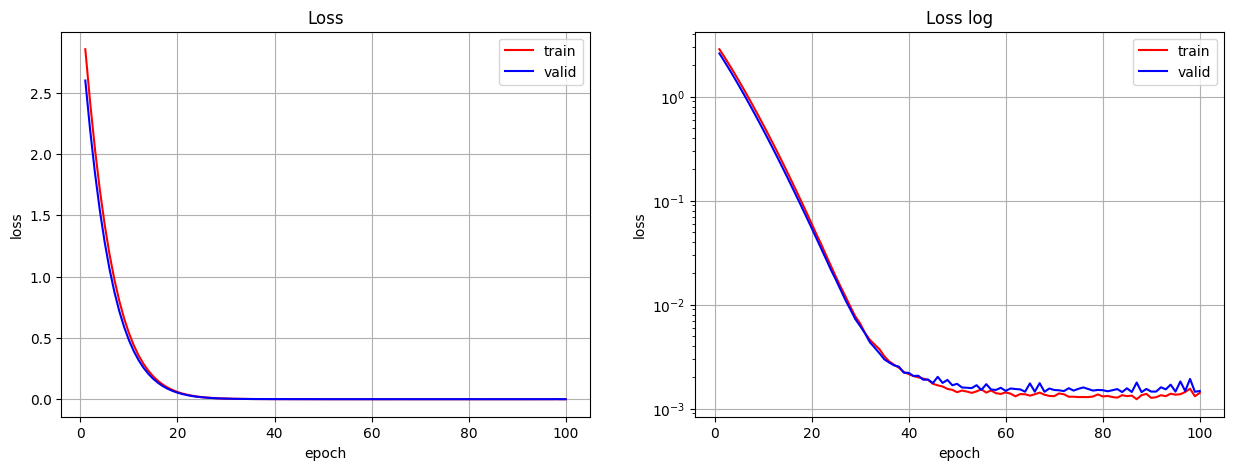

In [21]:
model_dnn_pca_two_components = Sequential((
    Flatten(input_shape=x_train_pca_two_components.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_pca_two_components, 
                         x_train_pca_two_components, y_train,
                         x_val_pca_two_components, y_val, 
                         x_test_pca_two_components, y_test)

### DNN Model with 3 principal components from PCA for all 15 indicators

In [22]:
all_indicators = data_provider.key_indicators + data_provider.additional_indicators

x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_principal_component_from_indicators(
        date, periods=6, indicators=all_indicators, n_components=3)
    x.append(indicators.values)

x_pca_three_components = np.array(x)

x_train_pca_three_components = x_pca_three_components[:val_split]
x_val_pca_three_components = x_pca_three_components[val_split:test_split]
x_test_pca_three_components = x_pca_three_components[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 486)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │         7,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,251 (32.23 KB)

 Trainable params: 8,251 (32.23 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.0347 - val_loss: 2.6127
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4879 - val_loss: 2.1252
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0187 - val_loss: 1.7129
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6238 - val_loss: 1.3694
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2954 - val_loss: 1.0869
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0262 - val_loss: 0.8569
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8075 - val_loss: 0.6714
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6311 - val_loss: 0.5230
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4905 - val_loss: 0.4050
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3788 - val_loss: 0.3119
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2910 - val_loss: 0.2389
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2222 - val_loss: 0.1819

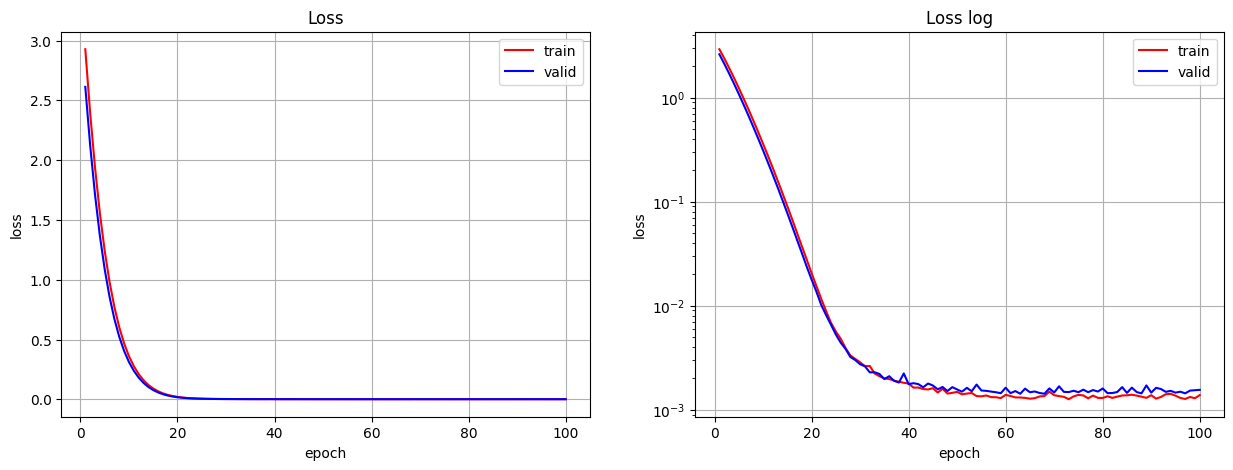

In [23]:
model_dnn_pca_three_components = Sequential((
    Flatten(input_shape=x_train_pca_three_components.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_pca_three_components, 
                         x_train_pca_three_components, y_train,
                         x_val_pca_three_components, y_val, 
                         x_test_pca_three_components, y_test)

### DNN Model with single principal component from PCA for all 15 indicators + returns

In [24]:
all_indicators = data_provider.key_indicators + data_provider.additional_indicators + ['Monthly Returns']

x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_principal_component_from_indicators(
        date, periods=6, indicators=all_indicators)
    x.append(indicators.values)

x_pca_component_all = np.array(x)

x_train_pca_component_all = x_pca_component_all[:val_split]
x_val_pca_component_all = x_pca_component_all[val_split:test_split]
x_test_pca_component_all_plus_returns = x_pca_component_all[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.8314 - val_loss: 2.5929
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5201 - val_loss: 2.3026
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2365 - val_loss: 2.0391
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9789 - val_loss: 1.8017
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7473 - val_loss: 1.5888
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5403 - val_loss: 1.3986
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3550 - val_loss: 1.2292
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1901 - val_loss: 1.0785
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0436 - val_loss: 0.9448
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9137 - val_loss: 0.8263
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7986 - val_loss: 0.7214
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6970 - val_loss: 0.6287

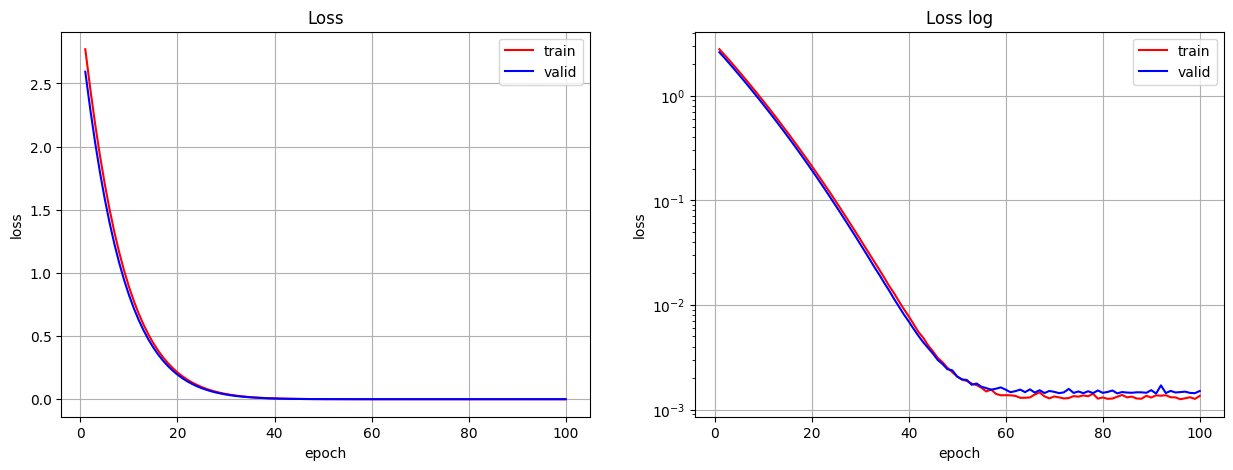

In [25]:
model_dnn_pca_component_all_plus_returns = Sequential((
    Flatten(input_shape=x_train_pca_component_all.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_pca_component_all_plus_returns, 
                         x_train_pca_component_all, y_train,
                         x_val_pca_component_all, y_val, 
                         x_test_pca_component_all_plus_returns, y_test)

### DNN Model with single principal component from PCA for all 15 indicators + economic cycle

In [26]:
all_indicators = data_provider.key_indicators + data_provider.additional_indicators + [
    'Economic Cycle X', 'Economic Cycle Y']

x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_principal_component_from_indicators(
        date, periods=6, indicators=all_indicators)
    x.append(indicators.values)

x_pca_component_all = np.array(x)

x_train_pca_component_all = x_pca_component_all[:val_split]
x_val_pca_component_all = x_pca_component_all[val_split:test_split]
x_test_pca_component_all_plus_cycle = x_pca_component_all[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.8772 - val_loss: 2.6368
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5613 - val_loss: 2.3419
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2731 - val_loss: 2.0741
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0116 - val_loss: 1.8326
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7762 - val_loss: 1.6160
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5657 - val_loss: 1.4226
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3776 - val_loss: 1.2502
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2097 - val_loss: 1.0970
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0610 - val_loss: 0.9611
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9289 - val_loss: 0.8407
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8120 - val_loss: 0.7342
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7085 - val_loss: 0.6402

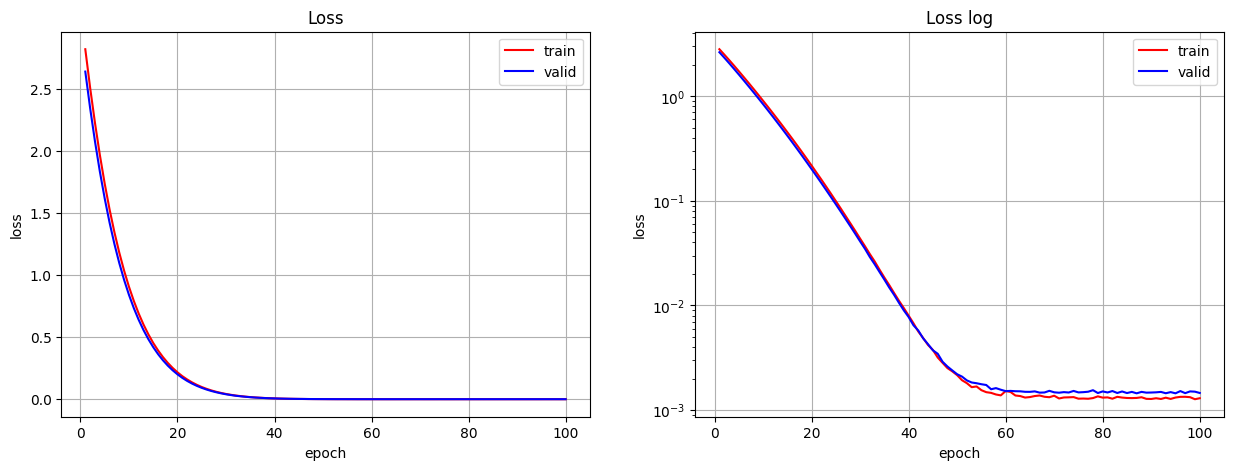

In [27]:
model_dnn_pca_component_all_plus_cycle = Sequential((
    Flatten(input_shape=x_train_pca_component_all.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_pca_component_all_plus_cycle, 
                         x_train_pca_component_all, y_train,
                         x_val_pca_component_all, y_val, 
                         x_test_pca_component_all_plus_cycle, y_test)

### DNN Model with single principal component from PCA for all 18 indicators

In [28]:
all_indicators = data_provider.key_indicators + data_provider.additional_indicators + [
    'Monthly Returns', 'Economic Cycle X', 'Economic Cycle Y']

x = []
for date in days_to_recalculate:
    indicators = data_provider.calculate_principal_component_from_indicators(
        date, periods=6, indicators=all_indicators)
    x.append(indicators.values)

x_pca_component_all = np.array(x)

x_train_pca_component_all = x_pca_component_all[:val_split]
x_val_pca_component_all = x_pca_component_all[val_split:test_split]
x_test_pca_component_all_18 = x_pca_component_all[test_split:]

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.8992 - val_loss: 2.6569
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5807 - val_loss: 2.3587
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2893 - val_loss: 2.0880
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0250 - val_loss: 1.8439
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7867 - val_loss: 1.6251
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5739 - val_loss: 1.4297
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3836 - val_loss: 1.2558
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2145 - val_loss: 1.1012
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0645 - val_loss: 0.9642
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9313 - val_loss: 0.8428
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8131 - val_loss: 0.7355
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7091 - val_loss: 0.6409

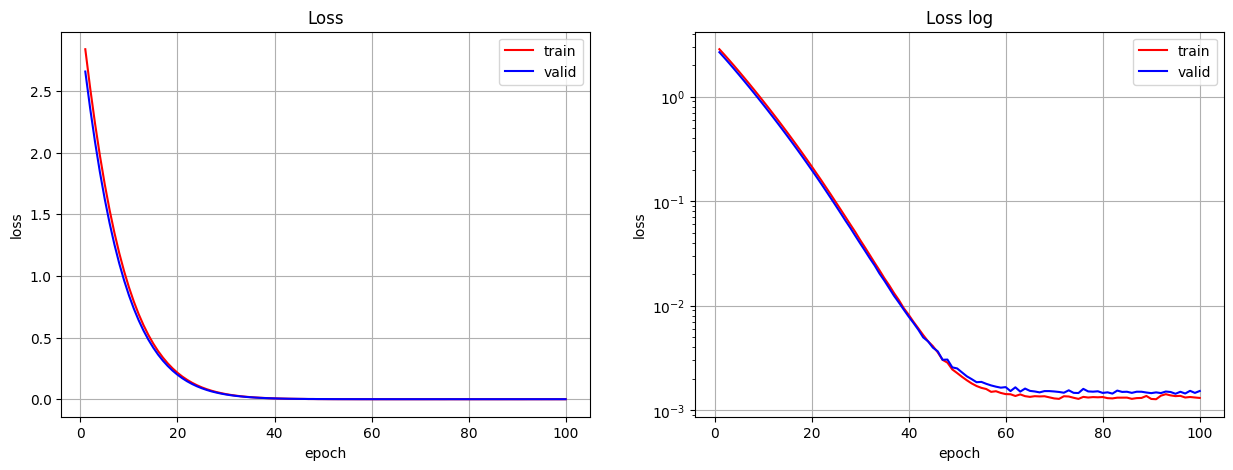

In [29]:
model_dnn_pca_component_all_18 = Sequential((
    Flatten(input_shape=x_train_pca_component_all.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn_pca_component_all_18, 
                         x_train_pca_component_all, y_train,
                         x_val_pca_component_all, y_val, 
                         x_test_pca_component_all_18, y_test)

## Backtesting

In [47]:
benchmark_test = benchmark[dates_for_test[0]:]
benchmark_returns = np.log(benchmark_test).diff().dropna()
cum_benchmark_returns = (1 + benchmark_returns).cumprod() - 1
cum_benchmark_returns.loc[dates_for_test[0]] = 0
cum_benchmark_returns.sort_index(inplace=True)

In [48]:
dates_for_test.insert(29, df_countries.index.values[-1])
df_prices_test = df_countries[dates_for_test[0]:]
df_returns_test = np.log(df_prices_test).diff().fillna(0)

In [49]:
(total_ret_simple_composite_indicator,
 cum_total_ret_simple_composite_indicator) = calculate_returns_for_model(
    model_dnn_simple_composite_indicator, x_test_simple_composite_indicator,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [50]:
(total_ret_manufacturing_pmi, 
 cum_total_ret_manufacturing_pmi) = calculate_returns_for_model(
    model_dnn_manufacturing_pmi, x_test_manufacturing_pmi,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step 


In [51]:
(total_ret_separate_indicators, 
 cum_total_ret_separate_indicators) = calculate_returns_for_model(
    model_dnn_separate_indicators, x_test_separate_indicators,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step


In [52]:
(total_ret_separate_all_indicators, 
 cum_total_ret_separate_all_indicators) = calculate_returns_for_model(
    model_dnn_separate_all_indicators, x_test_separate_all_indicators,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step 


In [53]:
(total_ret_pca_component, 
 cum_total_ret_pca_component) = calculate_returns_for_model(
    model_dnn_pca_component, x_test_pca_component,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [54]:
(total_ret_pca_component_all, 
 cum_total_ret_pca_component_all) = calculate_returns_for_model(
    model_dnn_pca_component_all, x_test_pca_component_all,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [55]:
(total_ret_pca_two_components, 
 cum_total_ret_pca_two_components) = calculate_returns_for_model(
    model_dnn_pca_two_components, x_test_pca_two_components,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [56]:
(total_ret_pca_three_components, 
 cum_total_ret_pca_three_components) = calculate_returns_for_model(
    model_dnn_pca_three_components, x_test_pca_three_components,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [57]:
(total_ret_pca_component_all_plus_returns, 
 cum_total_ret_pca_component_all_plus_returns) = calculate_returns_for_model(
    model_dnn_pca_component_all_plus_returns, x_test_pca_component_all_plus_returns,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [58]:
(total_ret_pca_component_all_plus_cycle, 
 cum_total_ret_pca_component_all_plus_cycle) = calculate_returns_for_model(
    model_dnn_pca_component_all_plus_cycle, x_test_pca_component_all_plus_cycle,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [59]:
(total_ret_pca_component_all_18, 
 cum_total_ret_pca_component_all_18) = calculate_returns_for_model(
    model_dnn_pca_component_all_18, x_test_pca_component_all_18,
    dates_for_test, df_returns_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


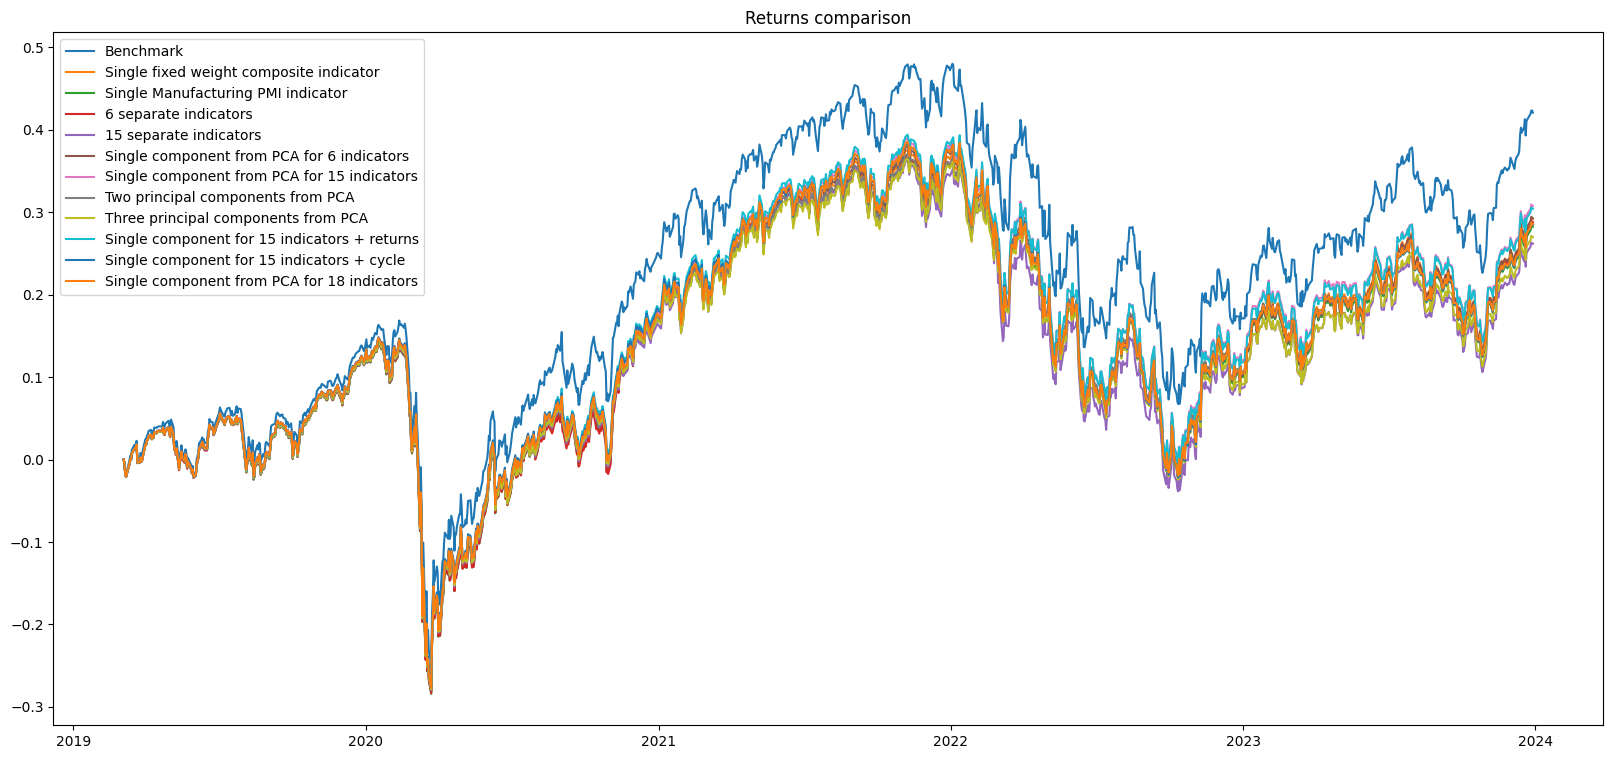

In [74]:
plt.figure(figsize=(20, 9))
plt.plot(cum_benchmark_returns, label='Benchmark')
plt.plot(cum_total_ret_simple_composite_indicator,
         label='Single fixed weight composite indicator')
plt.plot(cum_total_ret_manufacturing_pmi,
         label='Single Manufacturing PMI indicator')
plt.plot(cum_total_ret_separate_indicators,
         label='6 separate indicators')
plt.plot(cum_total_ret_separate_all_indicators,
         label='15 separate indicators')
plt.plot(cum_total_ret_pca_component,
         label='Single component from PCA for 6 indicators')
plt.plot(cum_total_ret_pca_component_all,
         label='Single component from PCA for 15 indicators')
plt.plot(cum_total_ret_pca_two_components,
         label='Two principal components from PCA')
plt.plot(cum_total_ret_pca_three_components,
         label='Three principal components from PCA')
plt.plot(cum_total_ret_pca_component_all_plus_returns,
         label='Single component for 15 indicators + returns')
plt.plot(cum_total_ret_pca_component_all_plus_cycle,
         label='Single component for 15 indicators + cycle')
plt.plot(cum_total_ret_pca_component_all_18,
         label='Single component from PCA for 18 indicators')
plt.legend()
plt.title('Returns comparison')
plt.show()

In [70]:
df_results = pd.DataFrame(columns=['Annual Returns',
                                   'Annual Volatility',
                                   'Annual Sharpe Ratio'])

calculate_metrics(benchmark_returns, df_results, 'Benchmark')
calculate_metrics(total_ret_simple_composite_indicator, df_results,
                  'Single fixed weight composite indicator')
calculate_metrics(total_ret_manufacturing_pmi, df_results,
                  'Single Manufacturing PMI indicator')
calculate_metrics(total_ret_separate_indicators, df_results,
                  '6 separate indicators')
calculate_metrics(total_ret_separate_all_indicators, df_results,
                  '15 separate indicators')
calculate_metrics(total_ret_pca_component, df_results,
                  'Single component from PCA for 6 indicators')
calculate_metrics(total_ret_pca_component_all, df_results,
                  'Single component from PCA for 15 indicators')
calculate_metrics(total_ret_pca_two_components, df_results,
                  'Two principal components from PCA')
calculate_metrics(total_ret_pca_three_components, df_results,
                  'Three principal components from PCA')
calculate_metrics(total_ret_pca_component_all_plus_returns, df_results,
                  'Single component for 15 indicators + returns')
calculate_metrics(total_ret_pca_component_all_plus_cycle, df_results,
                  'Single component for 15 indicators + cycle')
calculate_metrics(total_ret_pca_component_all_18, df_results,
                  'Single component from PCA for 18 indicators')


df_results = df_results.astype(float).round(4)
df_results

,Annual Returns,Annual Volatility,Annual Sharpe Ratio
Benchmark,0.0768,0.2033,0.3775
Single fixed weight composite indicator,0.0552,0.2014,0.2741
Single Manufacturing PMI indicator,0.0536,0.2014,0.2660
6 separate indicators,0.0546,0.2018,0.2704
15 separate indicators,0.0501,0.1999,0.2506
Single component from PCA for 6 indicators,0.0554,0.2014,0.2749
Single component from PCA for 15 indicators,0.0579,0.2005,0.2887
Two principal components from PCA,0.0541,0.2007,0.2695
Three principal components from PCA,0.0515,0.2000,0.2573
Single component for 15 indicators + returns,0.0573,0.2005,0.2859
